In [1]:
import numpy as npy
import pandas as pda
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def compute_cost(X, y, beta):
    return npy.square(npy.dot(X, beta.transpose()) - y).sum() / (2*len(y))

In [3]:
def gradient_descent(X, y, theta, alpha, iters):
    cost = list()
    
    for i in range(iters):
        theta = theta - alpha/len(y) * npy.dot((npy.dot(X,theta.transpose()) - y).transpose(), X)
        cost.append(compute_cost(X, y, theta))
    return theta, cost

In [4]:
def normal_equation(X, y):
    return npy.dot(npy.dot(npy.linalg.inv(npy.dot(X.transpose(),X)),X.transpose()),y).transpose()

In [ ]:
#Linear Regression - Simple Feature

In [5]:
data = pda.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])

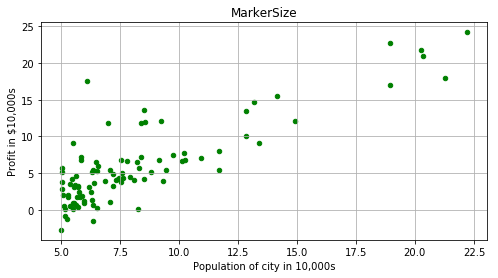

In [6]:
ax = data.plot(kind='scatter', x='Population', y='Profit', title='MarkerSize', figsize=(8,4), grid=True, color='Green');
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $10,000s')

In [7]:
data.insert(0, 'beta zero', 1)

In [8]:
tam = data.shape[1]
X = data.iloc[:,0:tam-1]
y = data.iloc[:,tam-1:tam]

In [9]:
X = npy.matrix(X.values)
y = npy.matrix(y.values)
beta = npy.matrix(npy.array([0,0]))

In [10]:
compute_cost(X, y, beta)

32.072733877455676

In [11]:
alpha = 0.01
iters = 1500

In [12]:
k, cost = gradient_descent(X, y, beta, alpha, iters)
k

matrix([[-3.63029144,  1.16636235]])

In [13]:
compute_cost(X, y, k)

4.4833882565877259

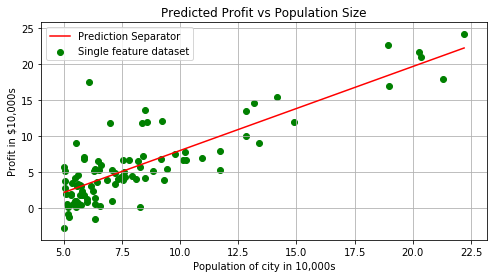

In [14]:
x = npy.linspace(data.Population.min(), data.Population.max(), 100)
f = k[0, 0] + (k[0, 1] * x)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f, 'r', label='Prediction Separator')
ax.scatter(data.Population, data.Profit, label='Single feature dataset', color='Green')
ax.legend(loc=2)
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Predicted Profit vs Population Size')
ax.grid(True)

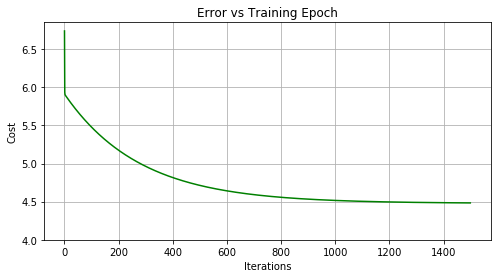

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(npy.arange(iters), cost, 'g')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_ylim(4.0)
ax.set_title('Error vs Training Epoch')
ax.grid(True)

In [16]:
beta0_vals = npy.linspace(-10, 10, 100)
beta1_vals = npy.linspace(-1, 4, 100)

In [17]:
j_vals = npy.zeros([len(beta0_vals), len(beta1_vals)])

In [18]:
for i in range(len(beta0_vals)):
    for j in range(len(beta1_vals)):
        t = npy.matrix(npy.array([beta0_vals[i], beta1_vals[j]]))
        j_vals[i,j] = compute_cost(X, y, t)

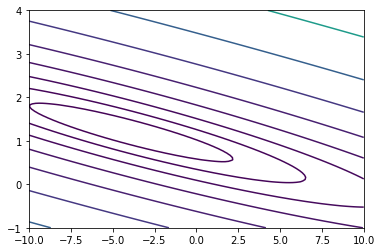

In [19]:
plt.contour(beta0_vals, beta1_vals, j_vals.T, npy.logspace(-2, 3, 20));

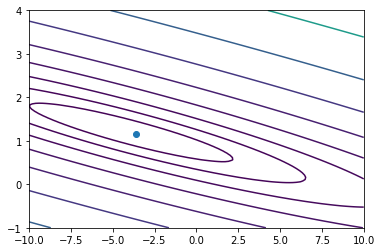

In [20]:
plt.scatter(k[0,0],k[0,1],)
plt.contour(beta0_vals, beta1_vals, j_vals.T, npy.logspace(-2, 3, 20));

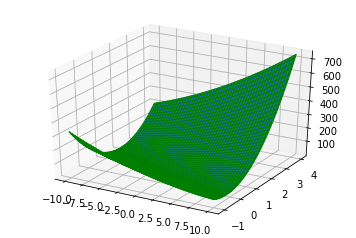

In [21]:
beta0_mesh, beta1_mesh = npy.meshgrid(beta0_vals, beta1_vals)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(beta0_mesh, beta1_mesh, j_vals.T, edgecolors='g');

In [ ]:
#Linear Regression - Multiple Features

In [22]:
data2 = pda.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2 = (data2 - data2.mean()) / data2.std()

In [23]:
data2.insert(0, 'beta zero', 1)

In [24]:
Tam_multi = data2.shape[1]
Xm = data2.iloc[:,0:Tam_multi-1]
ym = data2.iloc[:,Tam_multi-1:Tam_multi]

In [25]:
Xm = npy.matrix(Xm.values)
ym = npy.matrix(ym.values)
betam = npy.matrix(npy.array([0,0,0]))

In [26]:
alpham = 0.01
itersm = 1500

In [27]:
gm, costm = gradient_descent(Xm, ym, betam, alpham, itersm)
gm

matrix([[ -1.11051830e-16,   8.84042349e-01,  -5.24551809e-02]])

In [28]:
compute_cost(Xm, ym, gm)

0.13068670606095903

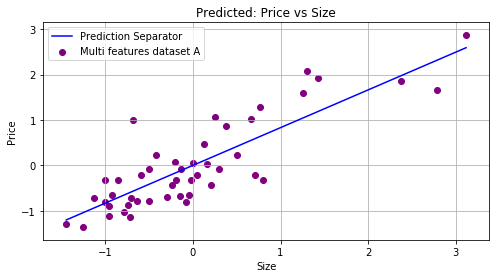

In [29]:
x = npy.linspace(data2.Size.min(), data2.Size.max(), 100)
f = gm[0, 0] + (gm[0, 1] * x) + (gm[0, 2] * x)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f, 'b', label='Prediction Separator')
ax.scatter(data2.Size, data2.Price, label='Multi features dataset A', color='purple')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Predicted: Price vs Size')
ax.grid(True)

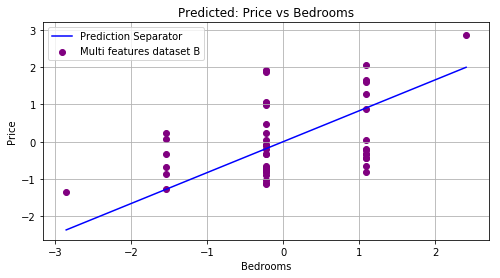

In [30]:
x = npy.linspace(data2.Bedrooms.min(), data2.Bedrooms.max(), 100)
f = gm[0, 0] + (gm[0, 1] * x) + (gm[0, 2] * x)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f, 'b', label='Prediction Separator')
ax.scatter(data2.Bedrooms, data2.Price, label='Multi features dataset B', color='purple')
ax.legend(loc=2)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Predicted: Price vs Bedrooms')
ax.grid(True)

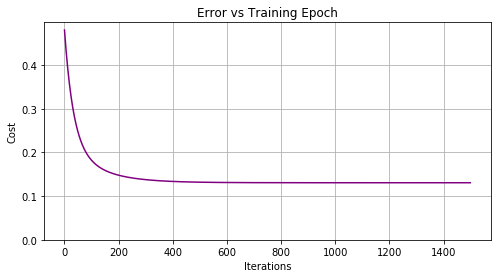

In [31]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(npy.arange(itersm), costm, 'purple')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_ylim(0.0)
ax.set_title('Error vs Training Epoch')
ax.grid(True)

In [32]:
beta0_vals = npy.linspace(-10, 10, 100)
beta1_vals = npy.linspace(-1, 4, 100)
j_vals = npy.zeros([len(beta0_vals), len(beta1_vals)])
for i in range(len(beta0_vals)):
    for j in range(len(beta1_vals)):
        t = npy.matrix(npy.array([beta0_vals[i], beta1_vals[j]]))
        j_vals[i,j] = compute_cost(X, y, t)

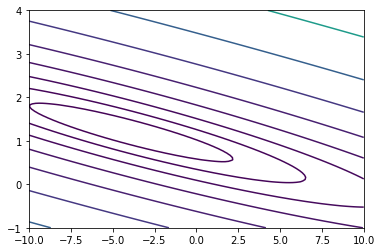

In [33]:
plt.contour(beta0_vals, beta1_vals, j_vals.T, npy.logspace(-2, 3, 20));

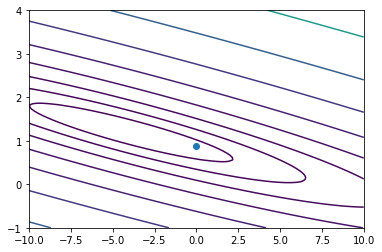

In [34]:
plt.scatter(gm[0,0],gm[0,1],)
plt.contour(beta0_vals, beta1_vals, j_vals.T, npy.logspace(-2, 3, 20));

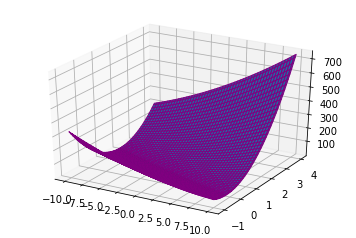

In [35]:
beta0_mesh, beta1_mesh = npy.meshgrid(beta0_vals, beta1_vals)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(beta0_mesh, beta1_mesh, j_vals.T, edgecolors='purple');

In [ ]:
#Normal Regularization

In [36]:
beta_normal = normal_equation(Xm,ym)
normal_equation(Xm,ym)

matrix([[ -1.04083409e-16,   8.84765988e-01,  -5.31788197e-02]])

In [37]:
compute_cost(Xm, ym, gm) - compute_cost(Xm, ym, beta_normal)

2.2552191702995827e-07

In [38]:
val1 = npy.dot(gm,npy.matrix('1 1650 3').transpose()).sum()
val1

1458.5125102702882

In [39]:
val2 = npy.dot(beta_normal,npy.matrix('1 1650 3').transpose()).sum()
val2

1459.7043435016808